<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
!ls drive/MyDrive/ML_course

application_data.csv.zip	columns_description.csv     previous_application.csv.zip
application_data_processed.zip	columns_description.gsheet
cars.csv			medical-charges.csv


In [128]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.subplots as ps
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
medical_df = pd.read_csv('drive/MyDrive/ML_course/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [129]:
x=non_smoker_df.age
y=non_smoker_df.charges
x_frame=x.to_frame()

In [130]:
x=np.expand_dims(x, axis=1)

In [131]:
x_intercept=np.c_[np.ones((x.shape[0],1)),x]

In [132]:
theta=np.linalg.inv(x_intercept.T.dot(x_intercept)).dot(x_intercept.T).dot(y)

In [133]:
y_pred=np.dot(x_intercept, theta)

In [134]:
rmse=np.sqrt(sum((y-y_pred)**2)/len(y))

In [135]:
rmse

4662.505766636393

In [136]:
def full_batch_gradient_descent(x, y, lr=0.0001, epochs=100000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    ers = []
    for _ in range(epochs):
        y_preds = m * x[:, 0] + b
        er = y_preds - y
        ers.append(sum(er**2))
        m_gradient = (2/n) * np.dot(er, x[:, 0])
        b_gradient = (2/n) * np.sum(er)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, ers

m, b, ers = full_batch_gradient_descent(x, y, lr=0.0001, epochs=100000)
predictions_fbgd = m * x[:, 0] + b

m, b

(262.34481049895373, -1873.6113407966325)

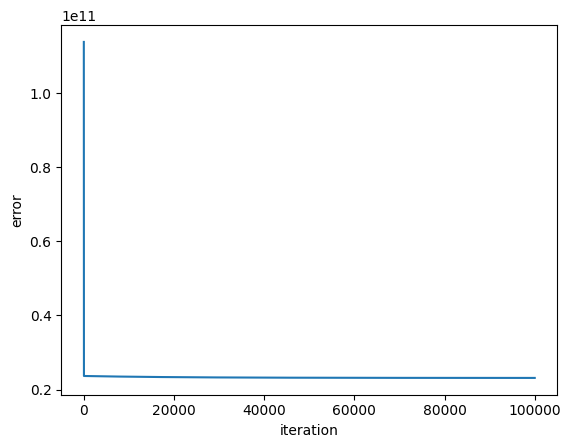

In [137]:
plt.plot(ers )
plt.xlabel('iteration')
plt.ylabel('error');

In [138]:
predictions_fbgd

array([2848.59524818, 5472.04335317, 6783.76740567, ..., 2848.59524818,
       2848.59524818, 3635.62967968])

In [139]:
root_mean_squared_error(y, predictions_fbgd)

4663.082007655704

In [140]:
lr=LinearRegression()
lr.fit(x_frame,y)

LinearRegression()

In [141]:
lr.coef_, lr.intercept_

(array([267.24891283]), -2091.4205565650864)

In [142]:
y_pred_lr=lr.predict(x_frame)

In [143]:
root_mean_squared_error(y, y_pred_lr)

4662.505766636395

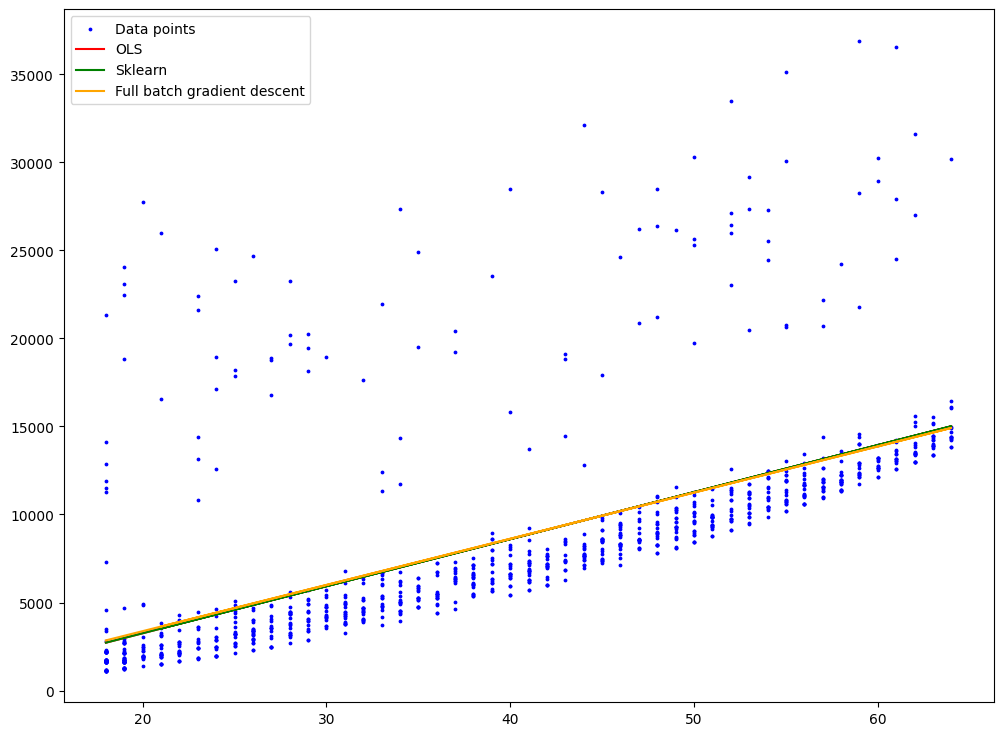

In [144]:
plt.figure(figsize=(12,9))
plt.scatter(non_smoker_df.age, non_smoker_df.charges, label='Data points', s=3, color='blue')
plt.plot(non_smoker_df.age, y_pred, color='red', label='OLS')
plt.plot(non_smoker_df.age, y_pred_lr, color='green', label='Sklearn')
plt.plot(non_smoker_df.age, predictions_fbgd, color='orange', label='Full batch gradient descent')
plt.legend();

При ручному підборі параметрів помилка становила 4679, за методом найменших квадратів та лінійною регресією з sklearn влалось досягнути помилки 4662, метод градієнтного спуску дав гірший результат при 1000 ітерацій - 4713 та 4663 на 100000 ітераціях, але при цьрму час виконання дуже сильно збільшився.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [145]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [146]:
lr_smoker=LinearRegression()

In [147]:
x_smoker=smoker_df.age.to_frame()
y_smoker=smoker_df.charges

In [148]:
y.describe()

,charges
count,1064.000000
mean,8434.268298
std,5993.781819
min,1121.873900
25%,3986.438700
50%,7345.405300
75%,11362.887050
max,36910.608030


In [149]:
lr_smoker.fit(x_smoker, y_smoker)

LinearRegression()

In [150]:
lr_smoker.coef_, lr_smoker.intercept_

(array([305.23760211]), 20294.128126915966)

In [151]:
y_pred_sm=lr_smoker.predict(x_smoker)

In [152]:
rmse_smoker=root_mean_squared_error(y_smoker, y_pred_sm)

In [153]:
rmse_smoker

10711.00334810241

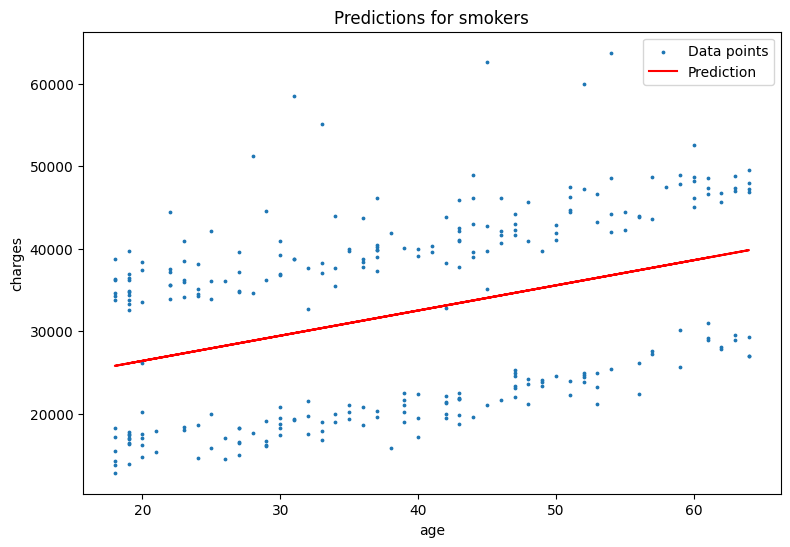

In [154]:
fig=plt.figure(figsize=(9,6))
plt.scatter(smoker_df.age, smoker_df.charges, label='Data points', s=3)
plt.plot(smoker_df.age, y_pred_sm, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Predictions for smokers')
plt.legend()
plt.show()

Модель дуже погана, показник RMSE дуже високий, в 2 рази більше за середньоквадратичне відхилення, оскільки дані дуже сильно відрізняються в межах одного й того ж віку, тож неможливо їх описати лінійною моделлю, принаймні за допомогою лише одного параметру "вік".